In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
file_path = 'Cleaned_Airline_Data_Indian.csv'  # Update this path to your file location
airline_data = pd.read_csv(file_path)
print(airline_data)

       AirLine_Name  Rating - 10                            Title  \
0     AirAsia India          6.0            "crew were welcoming"   
1     AirAsia India          1.0       "furious and disappointed"   
2     AirAsia India         10.0    "amazing service and support"   
3     AirAsia India          1.0        "Waste of time and money"   
4     AirAsia India          8.0     "thumbs up to boarding crew"   
...             ...          ...                              ...   
2200        Vistara          8.0  "Vistara was a good experience"   
2201        Vistara          6.0   "the journey was satisfactory"   
2202        Vistara         10.0                "value for money"   
2203        Vistara          8.0     "aircraft was new and fresh"   
2204        Vistara         10.0          Vistara customer review   

                        Name               Date  \
0                   V Bakshi  14th October 2023   
1                    G Oscar  14th October 2023   
2                R

In [4]:
# Convert 'Date' column to datetime format
airline_data['Date'] = pd.to_datetime(airline_data['Date'], errors='coerce', dayfirst=True)

# 1. Basic Sentiment Analysis Based on Ratings
airline_data['Sentiment_Category'] = np.where(airline_data['Rating - 10'] >= 7, 'Positive',
                                              np.where(airline_data['Rating - 10'] <= 4, 'Negative', 'Neutral'))

In [12]:
# 2. Top Positive and Negative Airlines
top_positive_airlines = airline_data[airline_data['Sentiment_Category'] == 'Positive']['AirLine_Name'].value_counts().head()
top_negative_airlines = airline_data[airline_data['Sentiment_Category'] == 'Negative']['AirLine_Name'].value_counts().head()


In [6]:
# 3. Rating Distribution Per Airline
rating_distribution = airline_data.groupby('AirLine_Name')['Rating - 10'].value_counts().unstack(fill_value=0)

In [9]:
# 4. Average Rating Trend Over Time for Each Airline
average_rating_trend = airline_data.groupby(['Date', 'AirLine_Name'])['Rating - 10'].mean().unstack()

# 5. Recommendation Ratio Over Time
airline_data['Recommendation_Binary'] = airline_data['Recommond'].str.lower().map({'yes': 1, 'no': 0})
recommendation_trend = airline_data.groupby('Date')['Recommendation_Binary'].mean() * 100  # As a percentage
print(recommendation_trend)

Date
2013-01-08    100.0
2013-10-07    100.0
2014-01-13     80.0
2014-10-12     30.0
2015-04-10     90.0
              ...  
2024-08-27      0.0
2024-08-28     60.0
2024-09-11     10.0
2024-09-12      0.0
2024-09-26     30.0
Name: Recommendation_Binary, Length: 174, dtype: float64


In [10]:
# 6. Monthly Analysis
airline_data['Month'] = airline_data['Date'].dt.to_period('M')
monthly_avg_rating = airline_data.groupby(['Month', 'AirLine_Name'])['Rating - 10'].mean().unstack()
monthly_recommendation_ratio = airline_data.groupby('Month')['Recommendation_Binary'].mean() * 100
print(monthly_avg_rating)
print(monthly_recommendation_ratio)

AirLine_Name  Air India Express  AirAsia India  AirIndia  Go First  IndiGo  \
Month                                                                        
2013-01                     NaN            NaN       NaN       NaN   8.875   
2013-10                     NaN            NaN       NaN       NaN   9.000   
2014-01                     NaN            NaN       NaN       NaN   8.100   
2014-10                     4.1            NaN       NaN       NaN     NaN   
2015-04                     NaN            NaN       NaN       NaN   8.600   
...                         ...            ...       ...       ...     ...   
2024-05                     NaN            NaN      1.20       NaN   5.600   
2024-06                     2.6            NaN      3.00       NaN     NaN   
2024-07                     NaN            NaN      1.50       NaN     NaN   
2024-08                     NaN            NaN      1.50       NaN   1.700   
2024-09                     1.2            NaN      2.35       N

In [11]:
# 7. Rating and Sentiment Distribution Comparison
rating_sentiment_distribution = airline_data.groupby(['AirLine_Name', 'Sentiment_Category'])['Rating - 10'].count().unstack(fill_value=0)

# Display the results
print("Top Positive Airlines:\n", top_positive_airlines)
print("\nTop Negative Airlines:\n", top_negative_airlines)

Top Positive Airlines:
 AirLine_Name
IndiGo           231
Vistara          167
SpiceJet         134
AirIndia          89
AirAsia India     36
Name: count, dtype: int64

Top Negative Airlines:
 AirLine_Name
AirIndia             437
SpiceJet             348
IndiGo               212
Go First             166
Air India Express     86
Name: count, dtype: int64


Text(0, 0.5, 'Number of Positive Reviews')

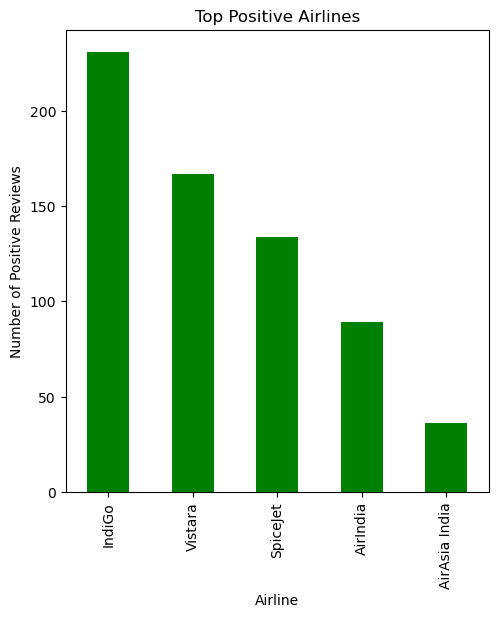

In [13]:
# Visualization 1: Top Positive and Negative Airlines
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_positive_airlines.plot(kind='bar', color='green')
plt.title('Top Positive Airlines')
plt.xlabel('Airline')
plt.ylabel('Number of Positive Reviews')

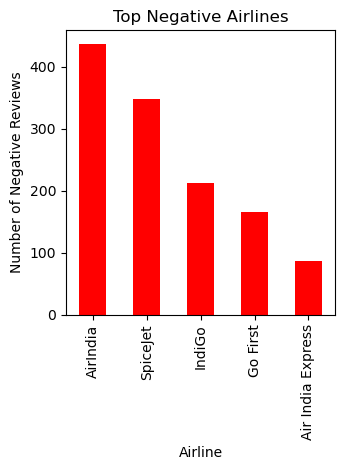

In [14]:

plt.subplot(1, 2, 2)
top_negative_airlines.plot(kind='bar', color='red')
plt.title('Top Negative Airlines')
plt.xlabel('Airline')
plt.ylabel('Number of Negative Reviews')

plt.tight_layout()
plt.show()


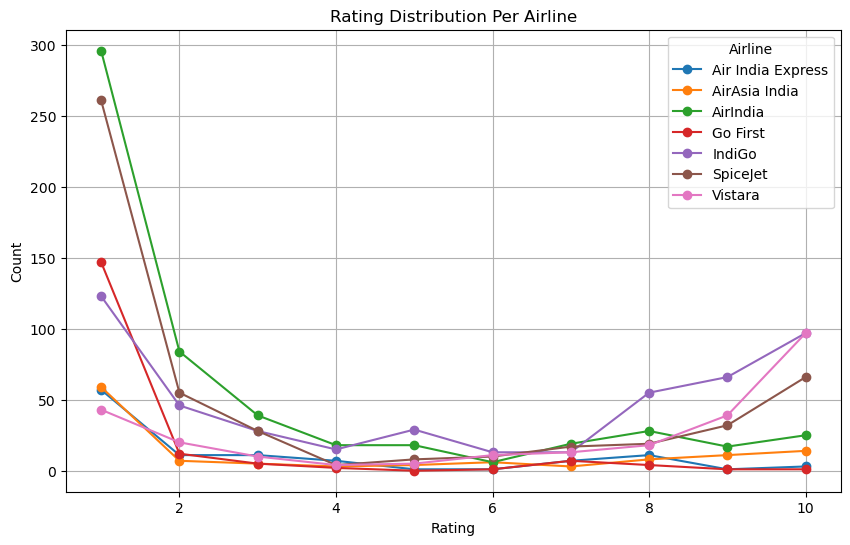

In [16]:
# Assuming 'rating_distribution' is a DataFrame with ratings as columns and airlines as rows.
plt.figure(figsize=(10, 6))

for airline in rating_distribution.index:
    plt.plot(rating_distribution.columns, rating_distribution.loc[airline], marker='o', label=airline)
plt.title('Rating Distribution Per Airline')
plt.xlabel('Rating')
plt.ylabel('Count') 
plt.legend(title='Airline')
plt.grid(True)
plt.show()


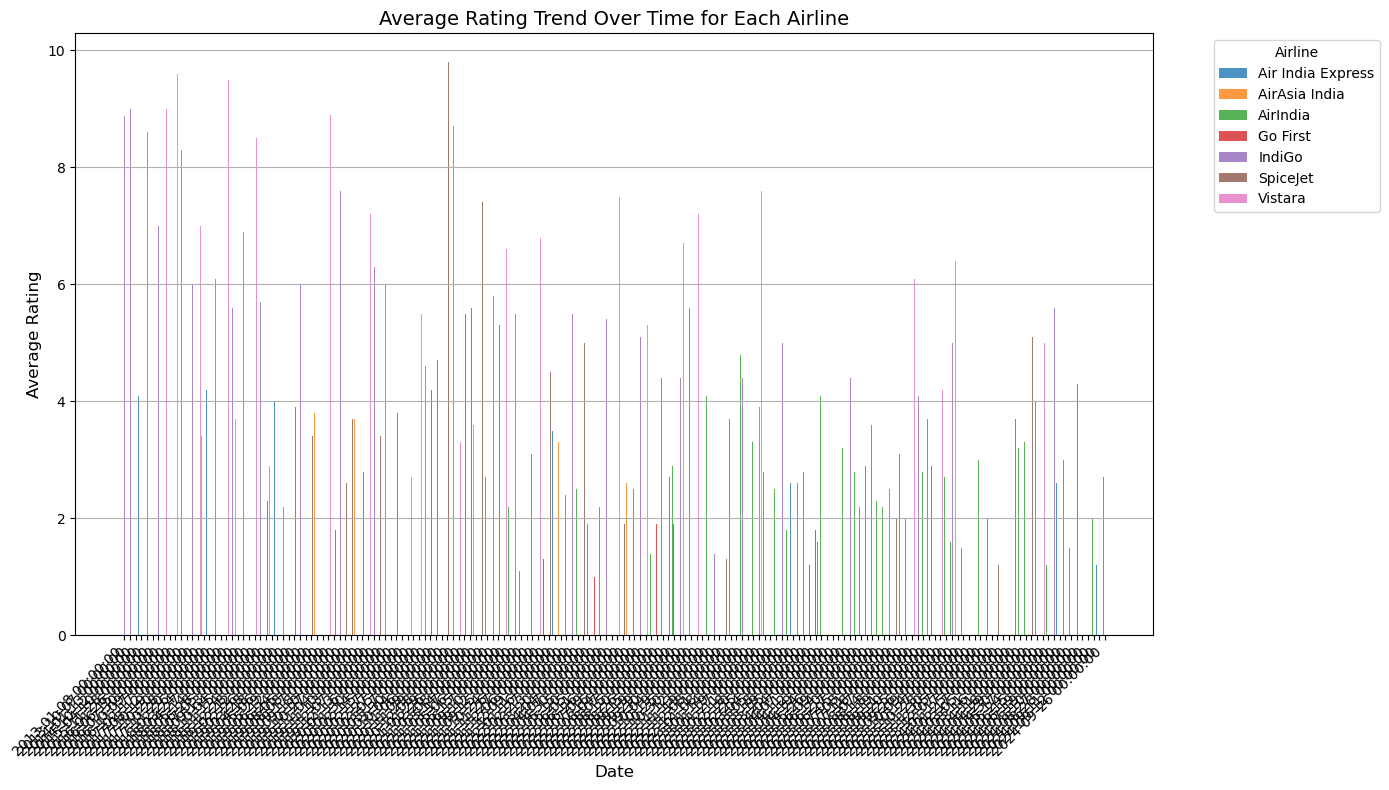

In [28]:
import numpy as np

plt.figure(figsize=(14, 8))

x = np.arange(len(average_rating_trend.index))
width = 0.15

for i, airline in enumerate(average_rating_trend.columns):
    plt.bar(x + width * i, average_rating_trend[airline], width=width, alpha=0.8, label=airline)

plt.xticks(x + width * (len(average_rating_trend.columns) / 2), average_rating_trend.index, rotation=45, ha='right')

plt.title('Average Rating Trend Over Time for Each Airline', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, axis='y')
plt.tight_layout()

plt.show()


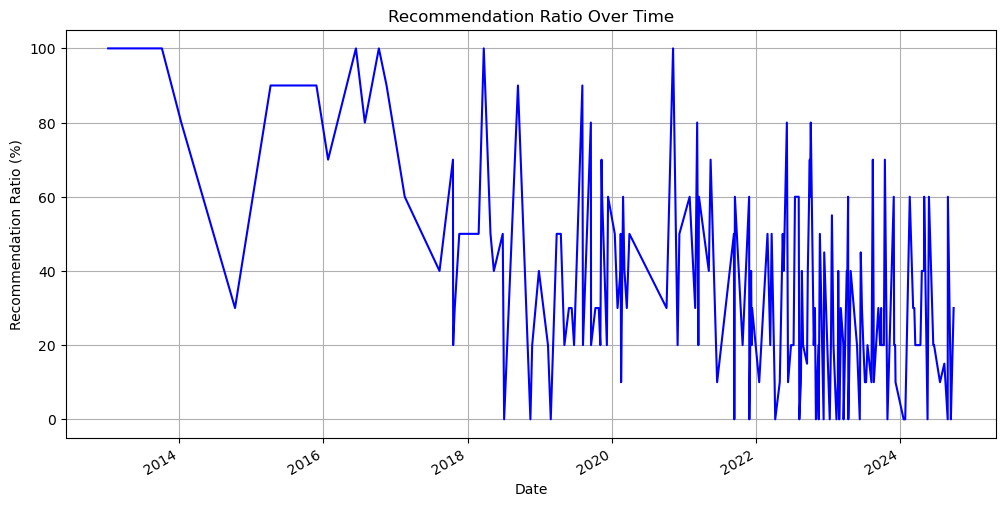

In [22]:
plt.figure(figsize=(12, 6))
recommendation_trend.plot(ax=plt.gca(), color='blue', linewidth=1.5)
plt.title('Recommendation Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Recommendation Ratio (%)')
plt.grid()
plt.show()


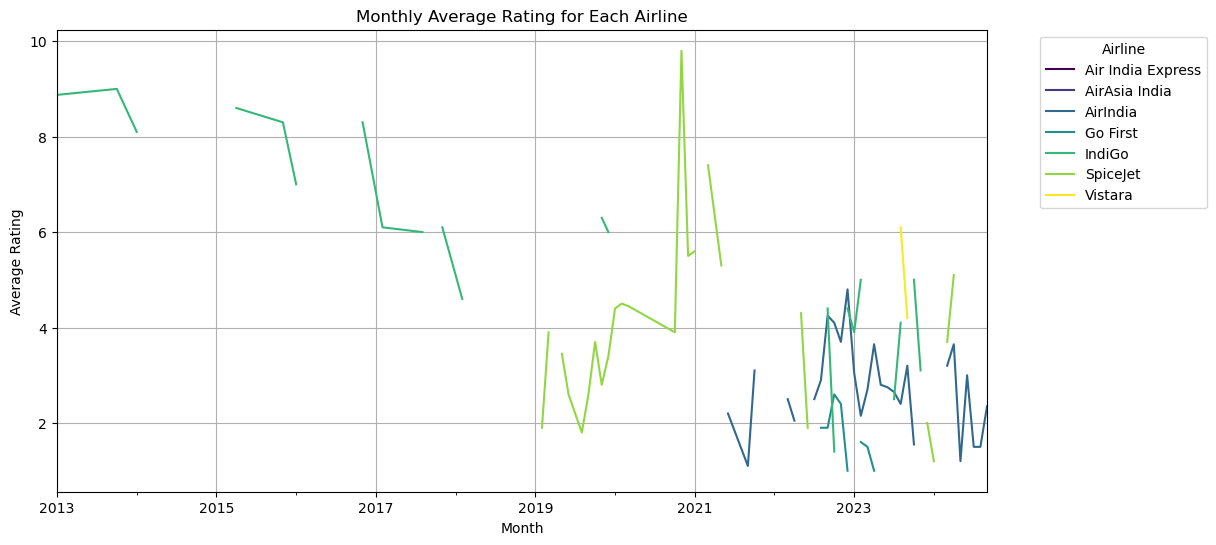

In [26]:
# Visualization 5: Monthly Average Rating
plt.figure(figsize=(12, 6))
monthly_avg_rating.plot(ax=plt.gca(), linewidth=1.5, colormap='viridis')
plt.title('Monthly Average Rating for Each Airline')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

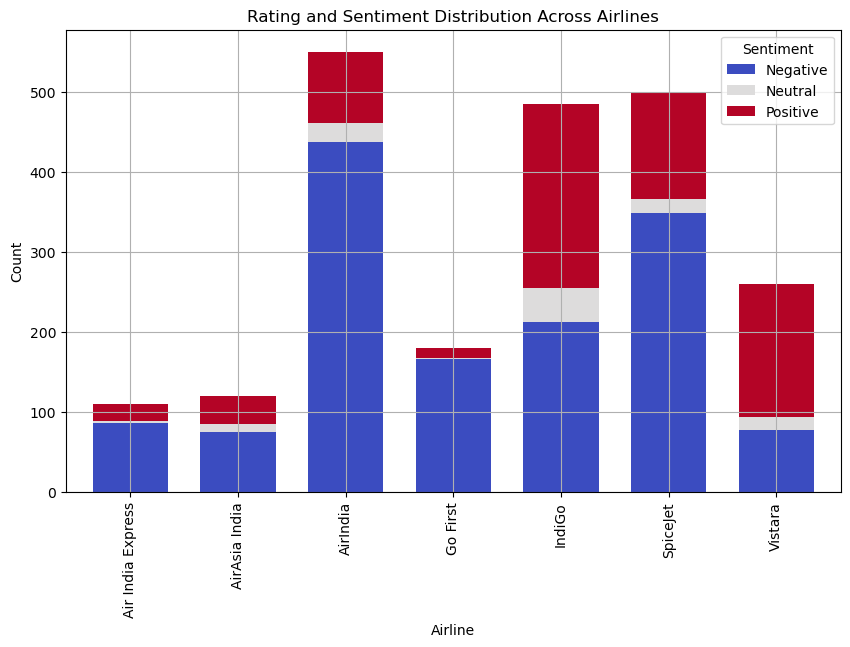

In [27]:
# Visualization 6: Rating and Sentiment Distribution Comparison
plt.figure(figsize=(10, 6))
rating_sentiment_distribution.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='coolwarm', width=0.7)
plt.title('Rating and Sentiment Distribution Across Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid()
plt.show()